In [1]:
%run data_loader.ipynb
%run model.ipynb

In [2]:
# Load dataset

dataset = RadarDataset(data_transform, "./data/images_train/")
val_dataset = RadarDataset(data_transform, "./data/images_val/")

data_loader = torch.utils.data.DataLoader(dataset, batch_size=1, collate_fn=collate_fn, num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, collate_fn=collate_fn, num_workers=1, shuffle=True)

In [3]:
model = model_ex2
model.to(device)

NewModel(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [4]:
num_epochs = 3
lr=0.0001
optimizer = torch.optim.Adam(model.parameters(), lr)

train_epoch_loss_list = []
val_epoch_loss_list = []
total_loss_dict = []

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for weather, imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(weather, imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for weather, imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(weather, imgs, targets)
        total_loss_dict.append(loss_dict)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex2_'+str(i+1)+'.pt')
    print(f'epoch : {i+1}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 5931/5931 [23:14<00:00,  4.25it/s]


epoch : 1, Train Loss : 0.23305470693860875, Val Loss : 1.3243260341485341


Iterating train dataset: 100%|██████████████| 5931/5931 [23:20<00:00,  4.24it/s]


epoch : 2, Train Loss : 0.15755164728051954, Val Loss : 0.14265433891986806


Iterating train dataset: 100%|██████████████| 5931/5931 [23:22<00:00,  4.23it/s]


epoch : 3, Train Loss : 0.13817297138691093, Val Loss : 0.1387955990259846


In [5]:
num_epochs = 12
lr=0.00001

print('----------------------train start--------------------------')

for i in range(num_epochs):
    epoch_loss = 0
    val_epoch_loss = 0
    model.train()
  
    # Valdiation data
    for weather, imgs, targets in tqdm(val_data_loader, 'Iterating validation dataset'):
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.no_grad():
            loss_dict = model(weather, imgs, targets) 
        losses = sum(loss for loss in loss_dict.values())
        val_epoch_loss += losses.item()
    mean_val_epoch_loss = val_epoch_loss/len(val_data_loader)

    # Train data
    for weather, imgs, targets in tqdm(data_loader, 'Iterating train dataset'):
        optimizer.zero_grad()
        imgs = list(img.to(device) for img in imgs)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        loss_dict = model(weather, imgs, targets)
        total_loss_dict.append(loss_dict)
        losses = sum(loss for loss in loss_dict.values())
        epoch_loss += losses.item()
        losses.backward()
        optimizer.step()
    mean_epoch_loss = epoch_loss/len(data_loader)
    
    train_epoch_loss_list.append(mean_epoch_loss)
    val_epoch_loss_list.append(mean_val_epoch_loss)
    
    # Save
    torch.save(model.state_dict(), './model/ex2_'+str(i+4)+'.pt')
    print(f'epoch : {i+4}, Train Loss : {mean_epoch_loss}, Val Loss : {mean_val_epoch_loss}')

----------------------train start--------------------------


Iterating train dataset: 100%|██████████████| 5931/5931 [23:26<00:00,  4.22it/s]


epoch : 4, Train Loss : 0.1230918291188799, Val Loss : 0.1293458212154607


Iterating train dataset: 100%|██████████████| 5931/5931 [23:27<00:00,  4.21it/s]


epoch : 5, Train Loss : 0.11311707216729677, Val Loss : 0.117220774213473


Iterating train dataset: 100%|██████████████| 5931/5931 [23:25<00:00,  4.22it/s]


epoch : 6, Train Loss : 0.10591134740890945, Val Loss : 0.11906275374566515


Iterating train dataset: 100%|██████████████| 5931/5931 [23:21<00:00,  4.23it/s]


epoch : 7, Train Loss : 0.09939914935110179, Val Loss : 0.12699443240029115


Iterating train dataset: 100%|██████████████| 5931/5931 [23:17<00:00,  4.25it/s]


epoch : 8, Train Loss : 0.09557298045481213, Val Loss : 0.12003033853943149


Iterating train dataset: 100%|██████████████| 5931/5931 [23:16<00:00,  4.25it/s]


epoch : 9, Train Loss : 0.08944678449277177, Val Loss : 0.13348640604317188


Iterating train dataset: 100%|██████████████| 5931/5931 [23:18<00:00,  4.24it/s]


epoch : 10, Train Loss : 0.08431534970282759, Val Loss : 0.12070253659039736


Iterating train dataset: 100%|██████████████| 5931/5931 [23:19<00:00,  4.24it/s]


epoch : 11, Train Loss : 0.08079919071614543, Val Loss : 0.11681301524676382


Iterating train dataset: 100%|██████████████| 5931/5931 [23:19<00:00,  4.24it/s]


epoch : 12, Train Loss : 0.11370678158491905, Val Loss : 0.12380104349429409


Iterating train dataset: 100%|██████████████| 5931/5931 [23:20<00:00,  4.23it/s]


epoch : 13, Train Loss : 0.07013051659313567, Val Loss : 0.12810724837115656


Iterating train dataset: 100%|██████████████| 5931/5931 [23:24<00:00,  4.22it/s]


epoch : 14, Train Loss : 0.07639653772848863, Val Loss : 0.11585172560997307


Iterating train dataset: 100%|██████████████| 5931/5931 [23:22<00:00,  4.23it/s]


epoch : 15, Train Loss : 0.07064913960638995, Val Loss : 0.10847182809685667


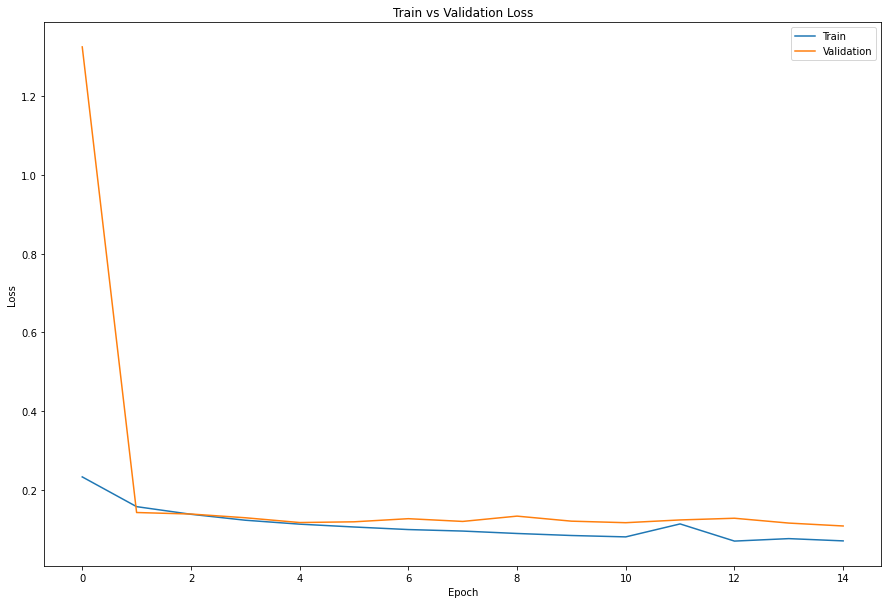

In [6]:
# Train result

y1 = train_epoch_loss_list
y2 = val_epoch_loss_list
x = list(range(0,len(y1)))

plt.figure(figsize=(15,10))
plt.plot(x, y1, label = "Train")
plt.plot(x, y2, label = "Validation")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()